## Exploratory Data Analysis (EDA)

In this notebook we will:

- Summarize the data
- Understand the dataset
- Uncover relationships between variables
- Identify important variables

## 1. Loaded Cleaned Dataset

- Load the cleaned dataset generated in `01_import_clean.ipynb`
- Use the processed version to unsure consistent results across notebooks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/processed/insurance_clean.csv")

## 2. Quick Overwiev

- Understand data size, column types, and basic descriptive statistics

In [3]:
print("Shape:", df.shape)
print("\nData types:")
df.info()
df.describe()

Shape: (1337, 7)

Data types:
<class 'pandas.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   str    
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   str    
 5   region    1337 non-null   str    
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.2 KB


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## 3. Univariate Analysis

Understand the distribution of individual variables and detect skewness or outliers.

We analyze:
- Numeric variables: `age`, `bmi`, `children`, `charges`
- Categorical variables: `sex`, `smoker`, `region`

## Numeric Variables

- Age - Distribution

In [4]:
df["age"].describe().round(2)

count    1337.00
mean       39.22
std        14.04
min        18.00
25%        27.00
50%        39.00
75%        51.00
max        64.00
Name: age, dtype: float64

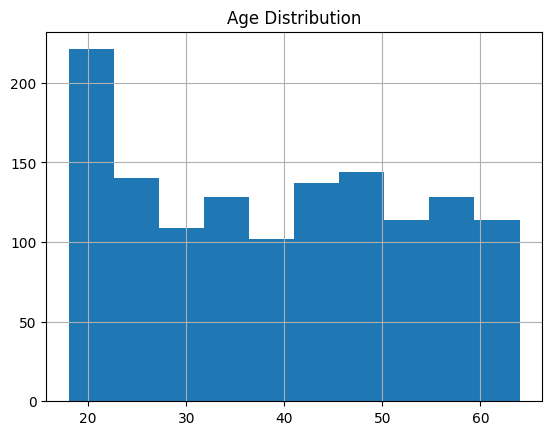

In [5]:
df["age"].hist()
plt.title("Age Distribution")
plt.show()

Age appears relatively evenly distributed across the range 18-24, with no strong skewness observed.

- BMI - Distribution

In [6]:
df["bmi"].describe().round(2)

count    1337.00
mean       30.66
std         6.10
min        15.96
25%        26.29
50%        30.40
75%        34.70
max        53.13
Name: bmi, dtype: float64

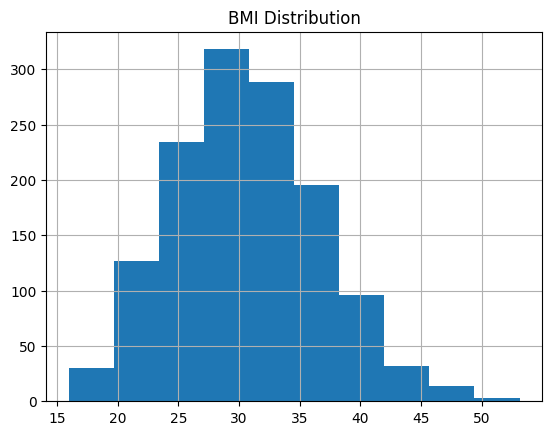

In [7]:
df["bmi"].hist()
plt.title("BMI Distribution")
plt.show()

BMI is centered arround 30 and slightly right-skewed, with a small number of high-value observations that may represent outliers.

- Children - Distribution

In [8]:
df["children"].describe().round(2)

count    1337.00
mean        1.10
std         1.21
min         0.00
25%         0.00
50%         1.00
75%         2.00
max         5.00
Name: children, dtype: float64

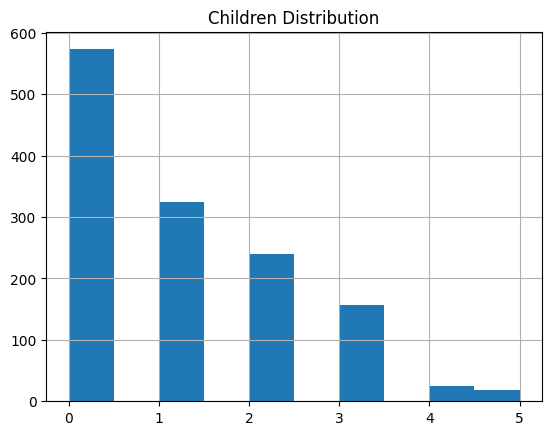

In [9]:
df["children"].hist()
plt.title("Children Distribution")
plt.show()

Most individuals have 0-2 children. The distribution is right-skewed.

- Charges - Distribution

In [10]:
df["charges"].describe().round(2)

count     1337.00
mean     13279.12
std      12110.36
min       1121.87
25%       4746.34
50%       9386.16
75%      16657.72
max      63770.43
Name: charges, dtype: float64

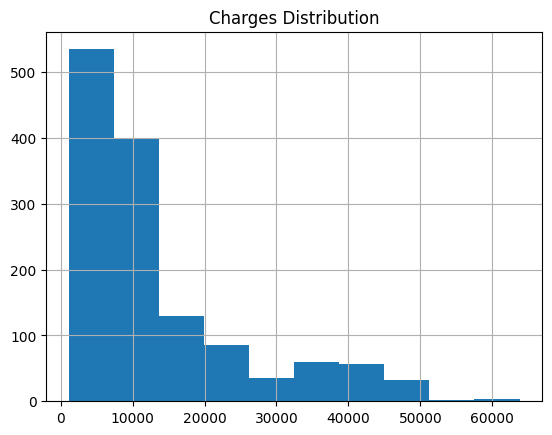

In [11]:
df["charges"].hist()
plt.title("Charges Distribution")
plt.show()

Insurance charges are highly right-skewed, with a small group of individuals incurring very high costs.

## Categorical Variables

- Sex - Distribution

In [12]:
df["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

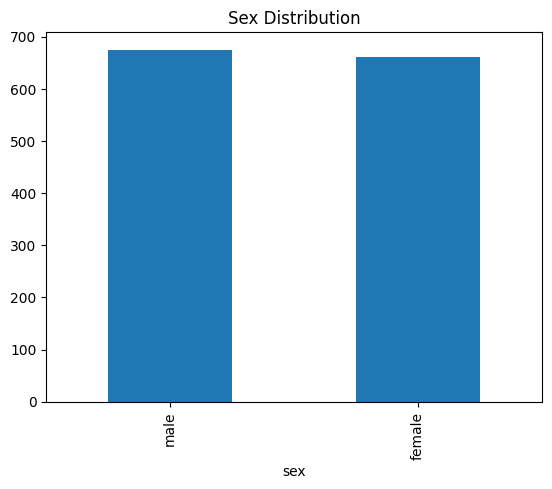

In [13]:
df["sex"].value_counts().plot(kind="bar")
plt.title("Sex Distribution")
plt.show()

The dataset is nearly evenly split between male and female individuals.

- Smoker - Distribution

In [14]:
df["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

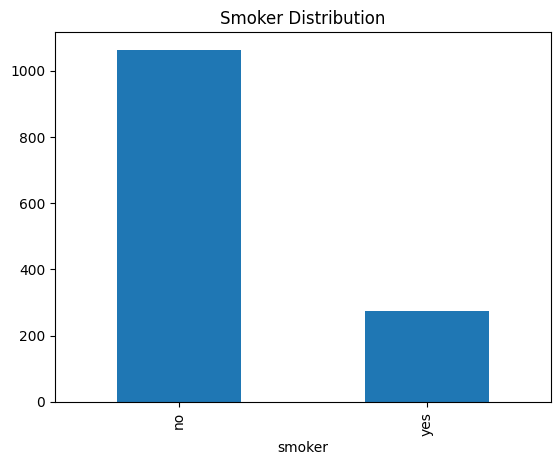

In [15]:
df["smoker"].value_counts().plot(kind="bar")
plt.title("Smoker Distribution")
plt.show()

The dataset contains significantly more non-smokers, which may strongly influence the distribution of insurance charges.

- Region - Distribution

In [16]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

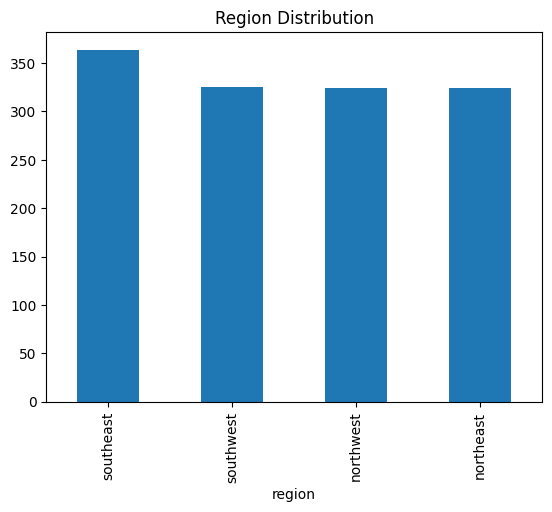

In [17]:
df["region"].value_counts().plot(kind="bar")
plt.title("Region Distribution")
plt.show()

The dataset contains four regions with relatively balanced representation.

## 4. Bivariate Analysis

In this section, we explore relationships between pairs of variables to understand what may influence the target variable **charges**.

We focus on:
- **Numeric vs Numeric**: `charhes` vs `age`, `bmi`, `children`
- **Categorical vs Numeric**: `charges` vs `smoker`, `sex`, `region`

Visualizations used:
- Scatter plots (numeric relationships)
- Box plots (charges across categories)

### 4.1 Charges vs Smoker

We compare insurance charges between smokers and non-smokers.

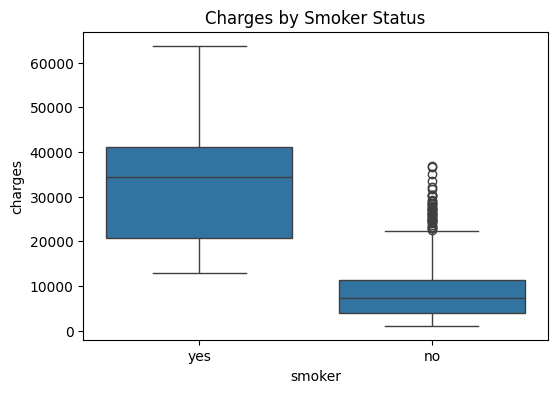

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="smoker", y= "charges", data=df)
plt.title("Charges by Smoker Status")
plt.show()

Smoking status has a substancial impact on insurance charges.

Smokers incur significantly higher medical costs compared to non-smokers, with a much higher median and overall distribution. The variability of charges is also greater among smokers, indicating more extreme high-cost cases.

This suggests that smoking is one of the strongest predictors of insurance charges in the dataset.

### 4.2 Charges vs Age

We check whether insurance charges tend to increase with age.

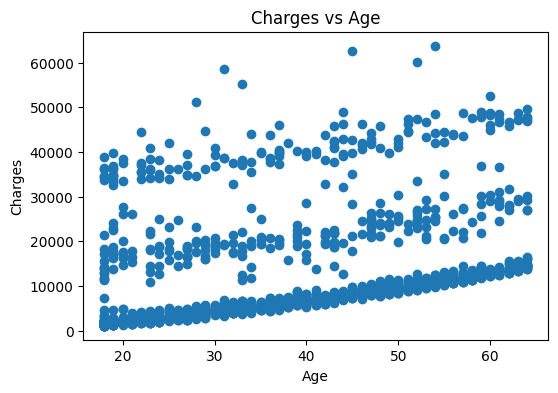

In [19]:
plt.figure(figsize=(6, 4))
plt.scatter(df["age"], df["charges"])
plt.title("Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Insurance charges generally increase with age, indicating a positive relationship between the two variables.

However, the data forms three distinct bands, suggesting that additional factors influence charges beyond age alone. This pattern indicates the presence of underlying group differences, likely driven by smoking status or other risk factors.

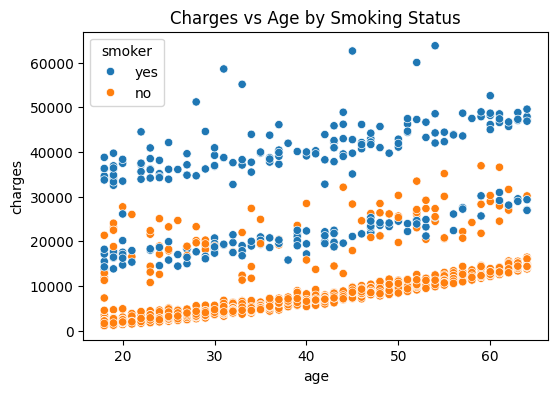

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Charges vs Age by Smoking Status")
plt.show()

Charges increase with age for both smokers and non-smokers.

However, smoking status creates a strong separation in cost levels. Smokers consistently incur significantly higher insurance charges across all age groups.

This suggests that smoking is one of the stronges drivers of medical insurance costs in the dataset.

### 4.3 Charges vs BMI

We explore whether BMI influences insurance charges and whether the effect differs between smokers and non-smokers.

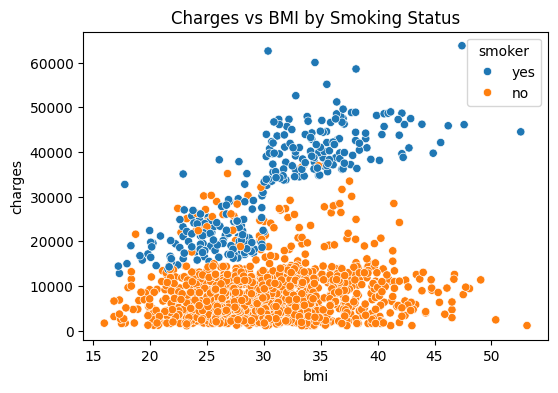

In [21]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df)
plt.title("Charges vs BMI by Smoking Status")
plt.show()

While BMI shows only a moderate relationship with charges overall, its effect becomes significantly stronger among smokers.

This suggests that BMI has a conditional impact, aplyfying the cost difference within the smoking population.

## 4.4 Charges vx Sex

We aegzamine whether insurance charges differ between males and females.

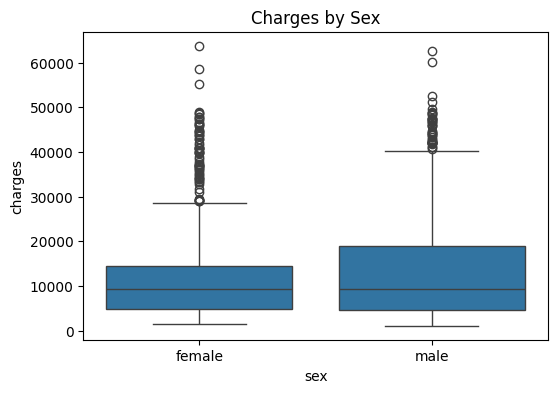

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Charges by Sex")
plt.show()

The distribution of insurance charges is very similar for males and females.

Both the median values and the overall spread of charges show substantial overlap.
This suggests that sex does not appear to be a significant predictor of insurance costs in this dataset.

## 4.5 Charges vs Region

We analyze whether insurance charges vary across regions.

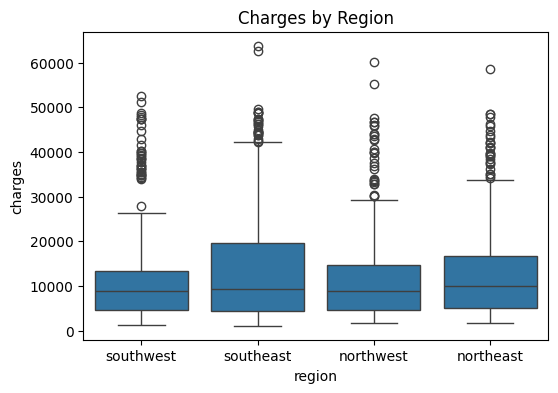

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="region", y="charges", data=df)
plt.title("Charges by Region")
plt.show()

Insurance charges are relatively consistent across all regions.

Although minor differences can be observed, the median values and overall distributions are largely comparable.
This indicates that geographic region does not strongly influence insurance charhes.

## 4.6 Charges vs Number of Children

We analyze whether the number of children affects insurance charges.

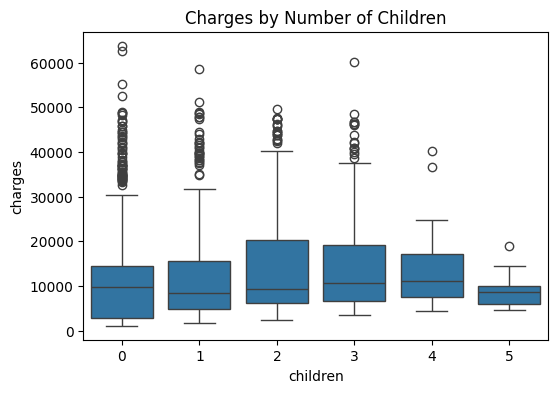

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="children", y="charges", data=df)
plt.title("Charges by Number of Children")
plt.show()

The number of children does not show a strong or consistent relationship with insurance charges.

Median values remain relatively stable across different categories, and no clear increasing or decreasing trend is visible.
This suggests that the number of dependents has limited impact on insurance costs.

## Summary of Bivariate Analysis

The bivariate analysis reveals that smoking status is the strongest predictor of insurance charges.

Age shows a moderate positive relationship with charges , while BMI demonstrates a conditional effect - its impact becomes significantly stronger among smokers.

In contrast, sex, region,. and number of children do not exhibit substantial influence on insurance costs.

Overall, the analysis suggests that lifestyle-related factors (especially smoking) play a far more important role than demografic characteristics in determining insurance charges.

## 5. Correlation Analysis

To quantify relationships between numeric variables, we compute the correlation matrix.
This allows us to measure the strenght and direction of linear relationships.

In [30]:
df["smoker_encoded"] = df["smoker"].map({"no": 0, "yes": 1})

In [31]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,age,bmi,children,charges,smoker_encoded
age,1.000000,0.109344,0.041536,0.298308,-0.025587
bmi,0.109344,1.000000,0.012755,0.198401,0.003746
children,0.041536,0.012755,1.000000,0.067389,0.007331
charges,0.298308,0.198401,0.067389,1.000000,0.787234
smoker_encoded,-0.025587,0.003746,0.007331,0.787234,1.000000


## Correlation Summary

The correlation analysis confirms that smoking status is by far the strongest predictor of insurance charges, with a very strong positive correlation (r ~ 0.79).

Age shows a moderate positive relationship with charges (r ~ 0.30), indicating the costs tend to increase with age.

BMI has a weaker positive correlation (r ~ 0.20), suggesting a limited overall linear relationship. However, earlier visial analysi revealed a conditional effect - BMI has a stronger impact among smokers.

The number of children exhibits a very weak correlation (r ~ 0.07), indicating minimal linear influence on insurance charges.

Overall, lifestyle-related factors, particularly smoking, dominate the cost structure.